# Assignment 2

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split

In [2]:
data=pd.read_csv("Churn_Modelling.csv")
data

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


### Data Analysis

In [3]:
data.head(5)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [5]:
data.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [6]:
data.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [7]:
# No of Unique Customers
data.CustomerId.nunique()

10000

In [8]:
data['Exited'].value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

In [9]:
# Grouping by Countries
data.groupby(['Geography']).agg({'RowNumber':'count', 'Exited':'mean'} ).reset_index().sort_values(by='RowNumber', ascending=False)

,Geography,RowNumber,Exited
0,France,5014,0.161548
1,Germany,2509,0.324432
2,Spain,2477,0.166734


## Univariate Analysis

C:\Users\HarisMurugan\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='NumOfProducts'>

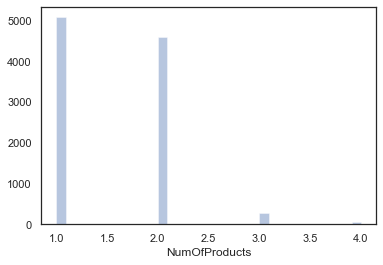

In [10]:
sns.set(style="white")
sns.distplot(data["NumOfProducts"], hist=True, kde=False)

<AxesSubplot:ylabel='CreditScore'>

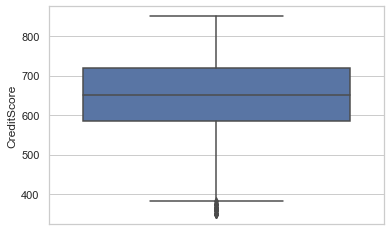

In [11]:
sns.set(style="whitegrid")
sns.boxplot(y=data['CreditScore'])

<AxesSubplot:ylabel='Tenure'>

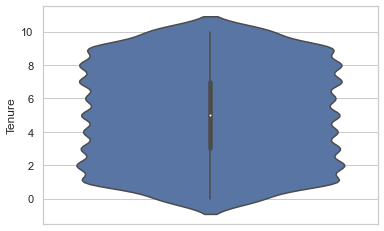

In [12]:
sns.violinplot(y = data['Tenure'])

(array([3.623e+03, 6.900e+01, 3.600e+02, 1.173e+03, 2.081e+03, 1.747e+03,
        7.290e+02, 1.860e+02, 3.000e+01, 2.000e+00]),
 array([     0.   ,  25089.809,  50179.618,  75269.427, 100359.236,
        125449.045, 150538.854, 175628.663, 200718.472, 225808.281,
        250898.09 ]),
 <BarContainer object of 10 artists>)

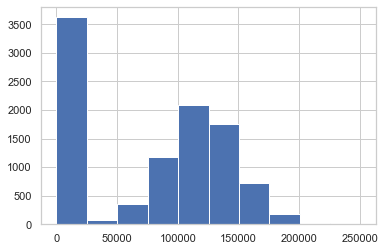

In [13]:
plt.hist(data['Balance'])

<AxesSubplot:ylabel='EstimatedSalary'>

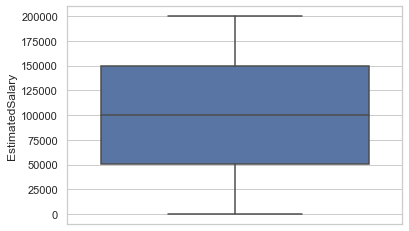

In [14]:
sns.set(style="whitegrid")
sns.boxplot(y=data['EstimatedSalary'])

## Bi-Variate Analysis and Multi Variate Analysis

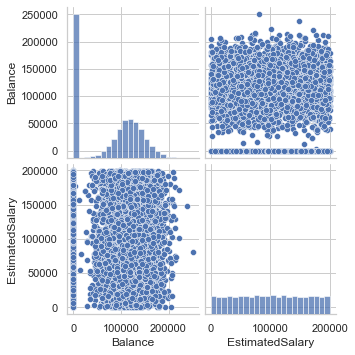

In [15]:
sns.pairplot(data,vars=['Balance','EstimatedSalary'])

<AxesSubplot:xlabel='Exited', ylabel='Age'>

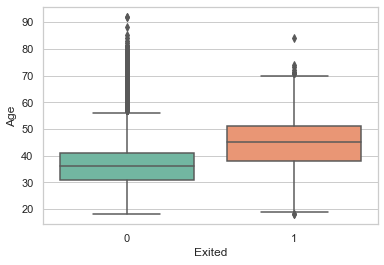

In [16]:
sns.boxplot(x="Exited", y="Age", data=data, palette="Set2")

<AxesSubplot:>

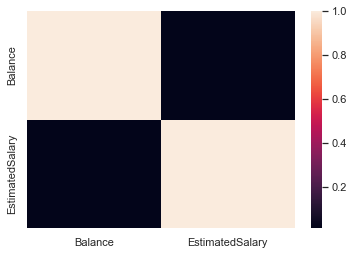

In [17]:
cor=data[['Balance','EstimatedSalary']].corr()
sns.heatmap(cor)

<AxesSubplot:xlabel='Exited', ylabel='Balance'>

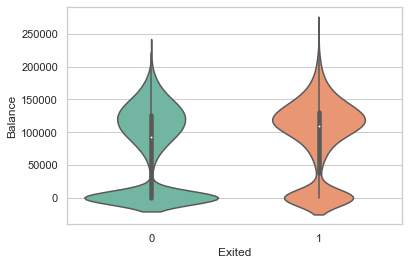

In [18]:
sns.violinplot(x="Exited", y="Balance", data=data, palette="Set2")

<AxesSubplot:xlabel='EstimatedSalary', ylabel='Age'>

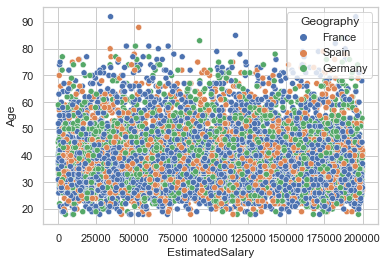

In [19]:
sns.scatterplot(y='Age',x='EstimatedSalary',data=data,hue='Geography')

<AxesSubplot:xlabel='NumOfProducts', ylabel='Balance'>

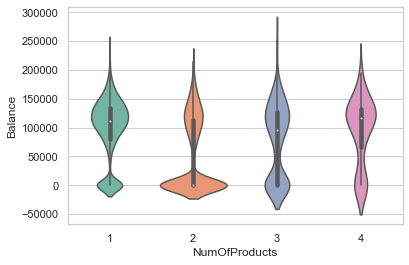

In [20]:
sns.violinplot(x="NumOfProducts", y="Balance", data=data, palette="Set2")

## Data Pre-Processing

In [21]:
target_var = ['Exited']
cols_to_remove = ['RowNumber', 'CustomerId']
num = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']
cat = ['Surname', 'Geography', 'Gender', 'HasCrCard', 'IsActiveMember']

In [22]:
y = data[target_var].values
data.drop(cols_to_remove, axis=1, inplace=True)

In [23]:
le = LabelEncoder()
data['Gender'] = le.fit_transform(data['Gender'])
le_gender_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
le_gender_mapping

{'Female': 0, 'Male': 1}

In [24]:
data.head(3)

,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,Hargrave,619,France,0,42,2,0.00,1,1,1,101348.88,1
1,Hill,608,Spain,0,41,1,83807.86,1,0,1,112542.58,0
2,Onio,502,France,0,42,8,159660.80,3,1,0,113931.57,1


In [25]:
le_ohe = LabelEncoder()
ohe = OneHotEncoder(handle_unknown = 'ignore', sparse=False)
enc_train = le_ohe.fit_transform(data.Geography).reshape(data.shape[0],1)
ohe_train = ohe.fit_transform(enc_train)
ohe_train
le_ohe_geography_mapping = dict(zip(le_ohe.classes_, le_ohe.transform(le_ohe.classes_)))
le_ohe_geography_mapping

{'France': 0, 'Germany': 1, 'Spain': 2}

In [26]:
cols = ['country_' + str(x) for x in le_ohe_geography_mapping.keys()]
cols

['country_France', 'country_Germany', 'country_Spain']

In [27]:
data = pd.concat([data.reset_index(), pd.DataFrame(ohe_train, columns = cols)], axis = 1).drop(['index'], axis=1)

In [28]:
data.head()

,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,country_France,country_Germany,country_Spain
0,Hargrave,619,France,0,42,2,0.00,1,1,1,101348.88,1,1.0,0.0,0.0
1,Hill,608,Spain,0,41,1,83807.86,1,0,1,112542.58,0,0.0,0.0,1.0
2,Onio,502,France,0,42,8,159660.80,3,1,0,113931.57,1,1.0,0.0,0.0
3,Boni,699,France,0,39,1,0.00,2,0,0,93826.63,0,1.0,0.0,0.0
4,Mitchell,850,Spain,0,43,2,125510.82,1,1,1,79084.10,0,0.0,0.0,1.0


In [29]:
data.drop(['Geography'], axis=1, inplace=True)

In [30]:
data.head()

,Surname,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,country_France,country_Germany,country_Spain
0,Hargrave,619,0,42,2,0.00,1,1,1,101348.88,1,1.0,0.0,0.0
1,Hill,608,0,41,1,83807.86,1,0,1,112542.58,0,0.0,0.0,1.0
2,Onio,502,0,42,8,159660.80,3,1,0,113931.57,1,1.0,0.0,0.0
3,Boni,699,0,39,1,0.00,2,0,0,93826.63,0,1.0,0.0,0.0
4,Mitchell,850,0,43,2,125510.82,1,1,1,79084.10,0,0.0,0.0,1.0


In [31]:
means = data.groupby(['Surname']).Exited.mean()
means.head()
means.tail()

Surname
Zubarev     0.0
Zubareva    0.0
Zuev        0.0
Zuyev       0.5
Zuyeva      0.0
Name: Exited, dtype: float64

In [32]:
global_mean = y.mean()
global_mean

0.2037

In [33]:
data['Surname_mean_churn'] = data.Surname.map(means)
data['Surname_mean_churn'].fillna(global_mean, inplace=True)

In [34]:
freqs = data.groupby(['Surname']).size()
freqs.head()

Surname
Abazu       2
Abbie       1
Abbott      4
Abdullah    1
Abdulov     2
dtype: int64

In [35]:
data['Surname_freq'] = data.Surname.map(freqs)
data['Surname_freq'].fillna(0, inplace=True)

In [36]:
data['Surname_enc'] = ((data.Surname_freq * data.Surname_mean_churn) - data.Exited)/(data.Surname_freq - 1)
data['Surname_enc'].fillna((((data.shape[0] * global_mean) - data.Exited) / (data.shape[0] - 1)), inplace=True)
data.head(5)

,Surname,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,country_France,country_Germany,country_Spain,Surname_mean_churn,Surname_freq,Surname_enc
0,Hargrave,619,0,42,2,0.00,1,1,1,101348.88,1,1.0,0.0,0.0,1.000000,1,0.203620
1,Hill,608,0,41,1,83807.86,1,0,1,112542.58,0,0.0,0.0,1.0,0.117647,17,0.125000
2,Onio,502,0,42,8,159660.80,3,1,0,113931.57,1,1.0,0.0,0.0,0.250000,8,0.142857
3,Boni,699,0,39,1,0.00,2,0,0,93826.63,0,1.0,0.0,0.0,0.214286,14,0.230769
4,Mitchell,850,0,43,2,125510.82,1,1,1,79084.10,0,0.0,0.0,1.0,0.100000,20,0.105263


In [37]:
data.drop(['Surname_mean_churn'], axis=1, inplace=True)
data.head()

,Surname,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,country_France,country_Germany,country_Spain,Surname_freq,Surname_enc
0,Hargrave,619,0,42,2,0.00,1,1,1,101348.88,1,1.0,0.0,0.0,1,0.203620
1,Hill,608,0,41,1,83807.86,1,0,1,112542.58,0,0.0,0.0,1.0,17,0.125000
2,Onio,502,0,42,8,159660.80,3,1,0,113931.57,1,1.0,0.0,0.0,8,0.142857
3,Boni,699,0,39,1,0.00,2,0,0,93826.63,0,1.0,0.0,0.0,14,0.230769
4,Mitchell,850,0,43,2,125510.82,1,1,1,79084.10,0,0.0,0.0,1.0,20,0.105263


In [38]:
data.drop(['Surname_freq'], axis=1, inplace=True)
data.drop(['Surname'], axis=1, inplace=True)

In [39]:
data.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,country_France,country_Germany,country_Spain,Surname_enc
0,619,0,42,2,0.00,1,1,1,101348.88,1,1.0,0.0,0.0,0.203620
1,608,0,41,1,83807.86,1,0,1,112542.58,0,0.0,0.0,1.0,0.125000
2,502,0,42,8,159660.80,3,1,0,113931.57,1,1.0,0.0,0.0,0.142857
3,699,0,39,1,0.00,2,0,0,93826.63,0,1.0,0.0,0.0,0.230769
4,850,0,43,2,125510.82,1,1,1,79084.10,0,0.0,0.0,1.0,0.105263


<AxesSubplot:>

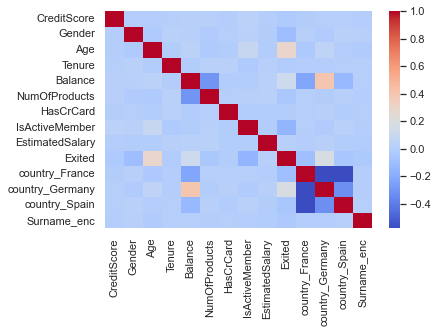

In [40]:
corr=data.corr()
sns.heatmap(corr, cmap = 'coolwarm')

In [42]:
data.columns
y

array([[1],
       [0],
       [1],
       ...,
       [1],
       [1],
       [0]], dtype=int64)

In [43]:
sc = StandardScaler()
cont_vars = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary', 'Surname_enc']
cat_vars = ['Gender', 'HasCrCard', 'IsActiveMember', 'country_France', 'country_Germany', 'country_Spain']
cols_to_scale = cont_vars
sc_X_train = sc.fit_transform(data[cols_to_scale])
sc_X_train = pd.DataFrame(data=sc_X_train, columns=cols_to_scale)
sc_X_train.shape
sc_X_train.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,EstimatedSalary,Surname_enc
0,-0.326221,0.293517,-1.041760,-1.225848,-0.911583,0.021886,-0.009151
1,-0.440036,0.198164,-1.387538,0.117350,-0.911583,0.216534,-0.454307
2,-1.536794,0.293517,1.032908,1.333053,2.527057,0.240687,-0.353198
3,0.501521,0.007457,-1.387538,-1.225848,0.807737,-0.108918,0.144568
4,2.063884,0.388871,-1.041760,0.785728,-0.911583,-0.365276,-0.566059


In [51]:

x_data = np.concatenate((data[cat_vars].values, sc_X_train.values), axis=1)
x_data.shape

(10000, 13)

In [53]:
x_data

array([[ 0.        ,  1.        ,  1.        , ..., -0.91158349,
         0.02188649, -0.00915136],
       [ 0.        ,  0.        ,  1.        , ..., -0.91158349,
         0.21653375, -0.45430694],
       [ 0.        ,  1.        ,  0.        , ...,  2.52705662,
         0.2406869 , -0.35319819],
       ...,
       [ 0.        ,  0.        ,  1.        , ..., -0.91158349,
        -1.00864308, -0.64733274],
       [ 1.        ,  1.        ,  0.        , ...,  0.80773656,
        -0.12523071,  0.09617405],
       [ 0.        ,  1.        ,  0.        , ..., -0.91158349,
        -1.07636976, -0.32324004]])

In [54]:
x_train, x_test, y_train, y_test = train_test_split(x_data, y, test_size = 0.2, random_state = 2)
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((8000, 13), (2000, 13), (8000, 1), (2000, 1))